## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [7]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
title_basics_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
le_ratings_df = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
movie_gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [3]:
from glob import glob

In [4]:
csv_files = glob("zippedData/*.csv.gz")

In [6]:
csv_files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [8]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [12]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

In [13]:
title_basics_df = csv_files_dict['imdb_title_crew_gz']

In [14]:
csv_files_dict['tmdb_movies_gz']

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [15]:
bom_movie_gross = csv_files_dict['bom_movie_gross_gz']

# Analyzing movie gross

In [17]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


A quick look tells me that foreign_gross is missing values and is an object whereas domestic_gross is float.

Why is the column missing values?

1. Movie did not release internationally
2. Movie did not earn anything in foreign markets
3. Missing data.


In this case, I am going to assume the movie didn't release internationally and just fill in all the missing values with 0.

In [18]:
bom_movie_gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [19]:
bom_movie_gross['foreign_gross'].value_counts()

1200000     23
1100000     14
4200000     12
1900000     12
2500000     11
            ..
43400000     1
23600000     1
242000       1
22800000     1
285000       1
Name: foreign_gross, Length: 1204, dtype: int64

In [20]:
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].fillna(value = 0)

In [21]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   3387 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [22]:
bom_movie_gross['foreign_gross'].value_counts()

0            1350
1200000        23
1100000        14
4200000        12
1900000        12
             ... 
205600000       1
160000          1
40600000        1
39300000        1
38000000        1
Name: foreign_gross, Length: 1205, dtype: int64

In [23]:
bom_movie_gross.reset_index(inplace=True)

In [24]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


I see that there are a few movies with domestic gross being missing. I am going to drop those as I want to analyze the domestic and foreign gross

In [25]:
bom_movie_gross.dropna(inplace=True)

In [26]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [27]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In here, I am assuming domestic_gross is for the US and foreign_gross is for the rest of the world. In order to get an idea of how much money the movie actually made, I can add these two columns and create a new column called worldwide_gross and use that to analyze the films

Before doing this, I need to convert the foreign gross column to int

In [29]:
bom_movie_gross['foreign_gross'].astype(int)

ValueError: invalid literal for int() with base 10: '1,131.6'

In [43]:
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace(",", "")

In [44]:
bom_movie_gross.loc[bom_movie_gross['foreign_gross'] == '1,131.6']

,title,studio,domestic_gross,foreign_gross,year


In [47]:
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].astype(float)

In [48]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [49]:
bom_movie_gross['worldwide_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']

In [50]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3356 non-null   object 
 1   studio           3356 non-null   object 
 2   domestic_gross   3356 non-null   float64
 3   foreign_gross    3356 non-null   float64
 4   year             3356 non-null   int64  
 5   worldwide_gross  3356 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 183.5+ KB


In [52]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [53]:
top_grossing_films = bom_movie_gross.sort_values(by = 'worldwide_gross', ascending=False)[0:25]

In [54]:
top_grossing_films.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


<AxesSubplot:xlabel='title', ylabel='worldwide_gross'>

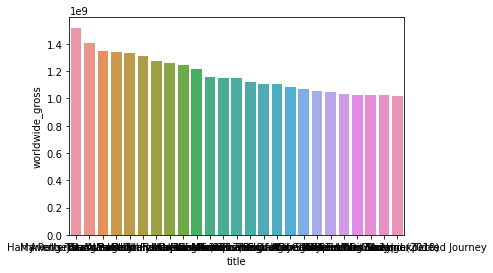

In [56]:
sns.barplot(x = "title", y = "worldwide_gross", data = top_grossing_films)

<AxesSubplot:xlabel='worldwide_gross', ylabel='title'>

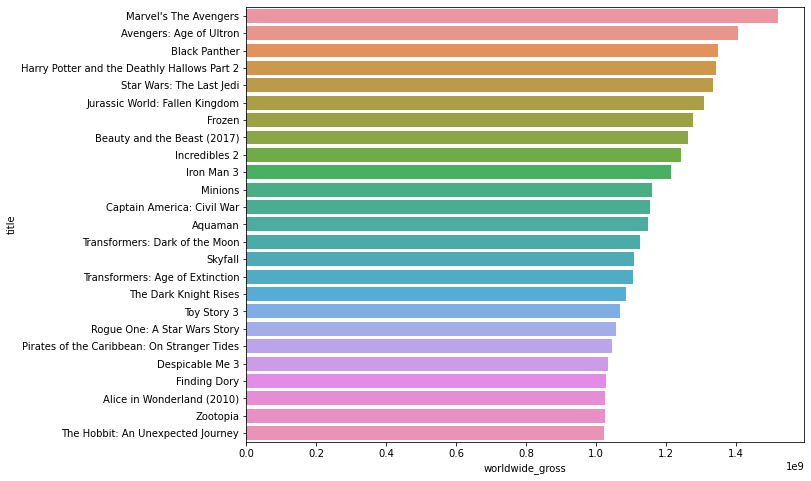

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(y = "title", x = "worldwide_gross", data = top_grossing_films)

In [59]:
studio_data = bom_movie_gross.groupby(by="studio").agg(['median', 'sum'])

In [65]:
studio_data['worldwide_gross']['sum']

studio
3D        16000000.0
A23         164200.0
A24      562656400.0
ADC         248200.0
AF         5642900.0
            ...     
XL          458000.0
YFG        1100000.0
Yash     304392100.0
Zee        1671000.0
Zeit.     25963500.0
Name: sum, Length: 255, dtype: float64

In [72]:
top_grossing_studio = studio_data.sort_values(by = [('worldwide_gross', 'sum')], ascending=False)[0:25]

In [83]:
worldwide_studio_gross = top_grossing_studio['worldwide_gross']['sum']

<AxesSubplot:xlabel='sum', ylabel='studio'>

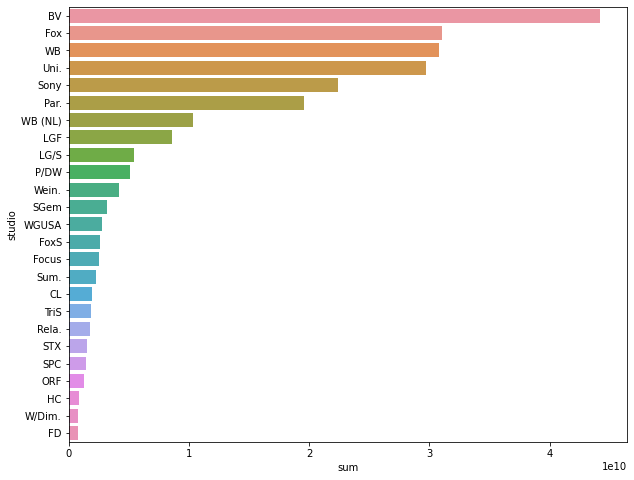

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(y = top_grossing_studio["studio"], x = worldwide_studio_gross)

## Recommendation

**From the above plot it is pretty clear that BV, Fox and WB are the top grossing studios worldwide. I would recommend Microsoft to partner with one of those studios on their movie debut**